In [12]:
# Project 1 - Lunar Madness

# Import dependencies
import pandas as pd
from prophet import Prophet
from astral import moon
import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

In [35]:
# Import Houston crime data and moon files
houston_data_file = 'Houston_Crime_Data_Source_File.csv'

# Read the data into a pandas dataframe
houston_data = pd.read_csv(houston_data_file)

houston_data.info()

C:\Users\Sheila\AppData\Local\Temp\ipykernel_25652\3243566670.py:5: DtypeWarning: Columns (2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  houston_data = pd.read_csv(houston_data_file)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185474 entries, 0 to 1185473
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Unnamed: 0         1185474 non-null  int64 
 1   Date               1185474 non-null  object
 2   Hour               1185474 non-null  object
 3   Offense Type       1185474 non-null  object
 4   Beat               1185458 non-null  object
 5   Premise            1169553 non-null  object
 6   BlockRange         1185474 non-null  object
 7   StreetName         1184583 non-null  object
 8   Type               1185474 non-null  object
 9   Suffix             1173737 non-null  object
 10  # offenses         1042377 non-null  object
 11  CleanedStreetName  1173220 non-null  object
dtypes: int64(1), object(11)
memory usage: 108.5+ MB


In [19]:
# Change Occurance Date to datetime format
houston_data['Date'] = pd.to_datetime(houston_data['Date'])

# Display DataFrame info and first 5 rows
houston_data.info()
houston_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185474 entries, 0 to 1185473
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Unnamed: 0         1185474 non-null  int64         
 1   Date               1185474 non-null  datetime64[ns]
 2   Hour               1185474 non-null  object        
 3   Offense Type       1185474 non-null  object        
 4   Beat               1185458 non-null  object        
 5   Premise            1169553 non-null  object        
 6   BlockRange         1185474 non-null  object        
 7   StreetName         1184583 non-null  object        
 8   Type               1185474 non-null  object        
 9   Suffix             1173737 non-null  object        
 10  # offenses         1042377 non-null  object        
 11  CleanedStreetName  1173220 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 108.5+ MB


,Unnamed: 0,Date,Hour,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses,CleanedStreetName
0,0,2016-02-13,15.0,Aggravated Assault,10H10,"Road, Street, or Sidewalk",1900-1999,RUNNELS,-,-,1.0,RUNNELS - -
1,1,2016-02-16,15.0,Theft,10H10,NaN,200-299,SAMPSON,ST,N,1.0,SAMPSON ST N
2,2,2016-02-19,11.0,Aggravated Assault,10H10,Apartment,200-299,GRACE,ST,-,2.0,GRACE ST -
3,3,2016-02-19,14.0,Theft,10H10,Residence or House,UNK,10812ELL PD,-,-,1.0,10812ELL PD - -
4,4,2016-02-20,19.0,Burglary,10H10,Residence or House,2100-2199,CANAL,ST,-,1.0,CANAL ST -


In [20]:
# Reduce original data down to only the needed rows, Data and Offense Type
reduced_houston_data = houston_data[['Date', 'Offense Type']]

# Rename Offense Type to Offense
reduced_houston_data = reduced_houston_data.rename(columns={'Offense Type': 'Offense'})

# Display DataFrame info and first 5 rows
reduced_houston_data.info()
reduced_houston_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185474 entries, 0 to 1185473
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1185474 non-null  datetime64[ns]
 1   Offense  1185474 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.1+ MB


,Date,Offense
0,2016-02-13,Aggravated Assault
1,2016-02-16,Theft
2,2016-02-19,Aggravated Assault
3,2016-02-19,Theft
4,2016-02-20,Burglary


In [21]:
# Import moon file
moon_data_file = 'moon_data_export.csv'

# Read the moon data into a pandas dataframe
moon_df = pd.read_csv(moon_data_file)

moon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Moon Phase             500 non-null    object
 1   Date                   500 non-null    object
 2   Time (Universal Time)  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [22]:
# Change Date to datetime format
moon_df['Date'] = pd.to_datetime(moon_df['Date'])

# Display moon_df info and first 5 rows
moon_df.info()
moon_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Moon Phase             500 non-null    object        
 1   Date                   500 non-null    datetime64[ns]
 2   Time (Universal Time)  500 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 11.8+ KB


,Moon Phase,Date,Time (Universal Time)
0,Last Quarter,2023-01-15,02:10
1,New Moon,2023-01-21,20:53
2,First Quarter,2023-01-28,15:19
3,Full Moon,2023-02-05,18:28
4,Last Quarter,2023-02-13,16:01


In [23]:
# Reduce original data down to only the needed rows, Data and Moon Phase
reduced_moon_data = moon_df[['Date', 'Moon Phase']]

# Display reduced Houston info and first 5 rows
reduced_moon_data.info()
reduced_moon_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        500 non-null    datetime64[ns]
 1   Moon Phase  500 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 7.9+ KB


,Date,Moon Phase
0,2023-01-15,Last Quarter
1,2023-01-21,New Moon
2,2023-01-28,First Quarter
3,2023-02-05,Full Moon
4,2023-02-13,Last Quarter


In [24]:
# Expand Moon Phase Dates by ±1 day
expanded_moon_data = []
for x, row in reduced_moon_data.iterrows():
    moon_date = row['Date']
    moon_phase = row['Moon Phase']
    # Create a 3-day range: moon_date ± 1 day
    for day in pd.date_range(moon_date - pd.Timedelta(days=1), moon_date + pd.Timedelta(days=1)):
        expanded_moon_data.append({'Date': day, 'Moon Phase': moon_phase})

# Convert expanded data into a DataFrame
expanded_moon_data = pd.DataFrame(expanded_moon_data)

# Merge on the Date column
merged_houston_lunar_data = pd.merge(reduced_houston_data, expanded_moon_data, on='Date', how='left')

# Update the Moon Phase column to "Other" for all phases that are not "New Moon" or "Full Moon"
merged_houston_lunar_data['Moon Phase'] = merged_houston_lunar_data['Moon Phase'].apply(
    lambda x: x 
    if x in ['New Moon', 'Full Moon'] 
    else 'Other')

# Step 3: Inspect the result
merged_houston_lunar_data.head(10)


,Date,Offense,Moon Phase
0,2016-02-13,Aggravated Assault,Other
1,2016-02-16,Theft,Other
2,2016-02-19,Aggravated Assault,Other
3,2016-02-19,Theft,Other
4,2016-02-20,Burglary,Other
5,2016-02-21,Auto Theft,Full Moon
6,2016-02-22,Theft,Full Moon
7,2016-01-10,Burglary,New Moon
8,2016-01-10,Burglary,New Moon
9,2016-02-01,Theft,Other


In [25]:
# Create a pivot table to count the number of offenses per Moon Phase
lunar_phase_pivot_table = merged_houston_lunar_data.pivot_table(
    index='Moon Phase',     # Rows of the pivot table
    values='Offense',       # Column to aggregate (e.g., counting offenses)
    aggfunc='count'         # Aggregation function (count the number of offenses)
)

# Display the pivot table
lunar_phase_pivot_table

,Offense
Moon Phase,
Full Moon,68385
New Moon,69115
Other,1050122


In [26]:
# Count the number of offenses per Moon Phase
crime_counts = merged_houston_lunar_data.groupby('Moon Phase')['Offense'].count()

# Calculate the total number of offenses
total_crimes = crime_counts.sum()

# Calculate the crime rate percentage for each Moon Phase
crime_rate_percentage = (crime_counts / total_crimes) * 100

# Reset the index and rename the columns
crime_rate_df = crime_rate_percentage.reset_index()
crime_rate_df.columns = ['Moon Phase', 'Crime Rate (%)']

# Display the crime rate DataFrame
crime_rate_df


,Moon Phase,Crime Rate (%)
0,Full Moon,5.758145
1,New Moon,5.819613
2,Other,88.422242


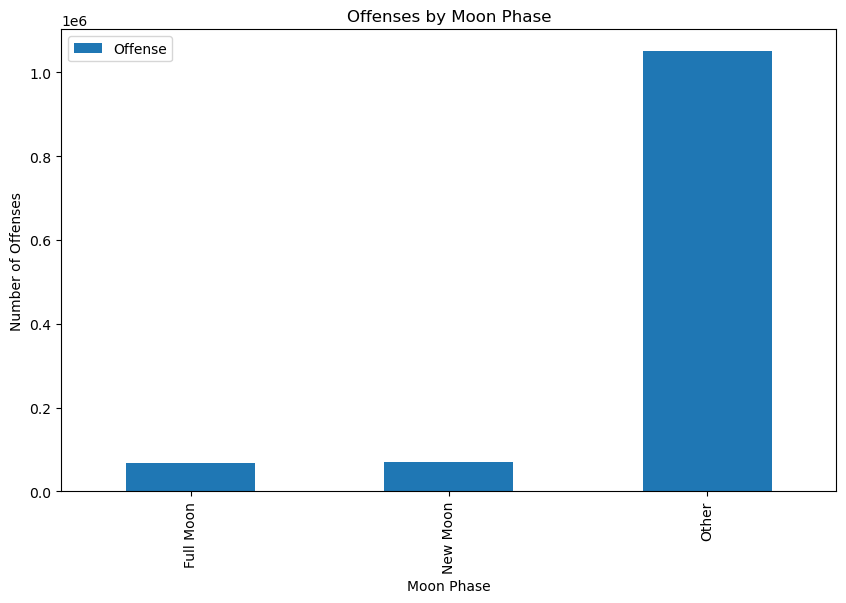

In [27]:
# Bar plot of offenses by moon phase
lunar_phase_pivot_table.plot(kind='bar', figsize=(10, 6), title='Offenses by Moon Phase')
plt.xlabel('Moon Phase')
plt.ylabel('Number of Offenses')
plt.show()
